<a href="https://colab.research.google.com/github/20025478/AI/blob/main/Copy_of_Fashion_MNST_using_LeNet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy

In [ ]:
import pandas as pd
import numpy as np

# Load the CSV files
train_df = pd.read_csv('/content/fashion-mnist_train.csv')
test_df = pd.read_csv('/content/fashion-mnist_test.csv')

In [ ]:
# Display the first few rows of the train and test datasets
print("Training Data:")
print(train_df.head())

print("\nTest Data:")
print(test_df.head())

# Check the shape of the datasets
print("\nTraining Data Shape:", train_df.shape)
print("Test Data Shape:", test_df.shape)


Training Data:
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0    

Each training and test example is assigned to one of the following labels:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Extract labels
y_train = train_df['label'].values
y_test = test_df['label'].values

# Drop labels from the dataset
X_train = train_df.drop(columns=['label']).values
X_test = test_df.drop(columns=['label']).values

# Normalize the pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data to match the input shape of a CNN
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [ ]:
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)
Training labels shape: (60000, 10)
Test labels shape: (10000, 10)


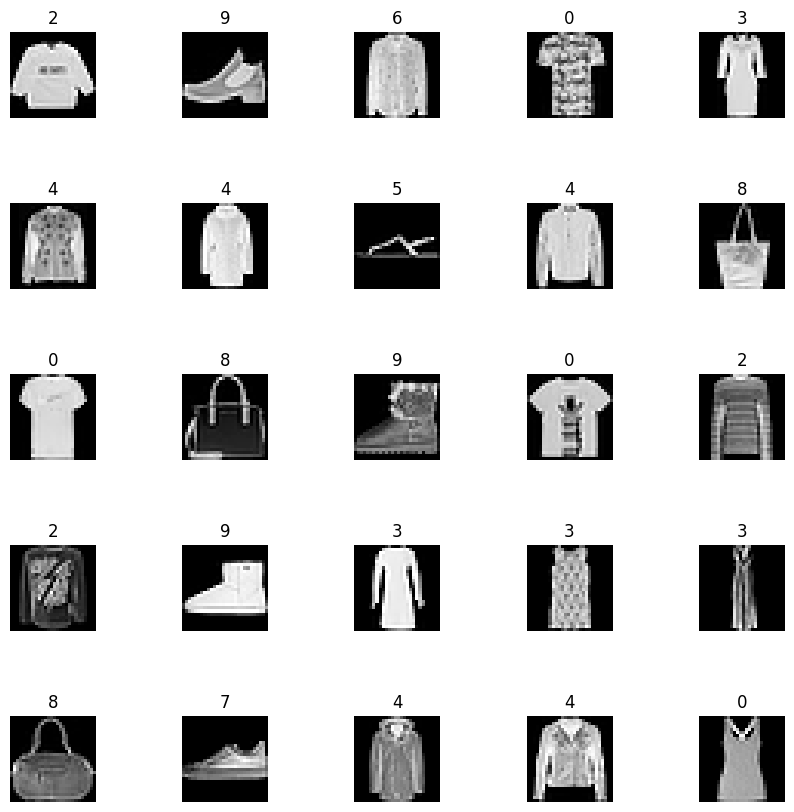

In [ ]:
import matplotlib.pyplot as plt

# Function to display images in a grid
def display_images(images, labels, num_rows=5, num_cols=5):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
    axes = axes.ravel()
    for i in np.arange(0, num_rows * num_cols):
        axes[i].imshow(images[i].reshape(28, 28), cmap='gray')
        axes[i].set_title(np.argmax(labels[i]))
        axes[i].axis('off')
    plt.subplots_adjust(wspace=1, hspace=1)
    plt.show()

# Display first 25 images from the training dataset
display_images(X_train, y_train)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import numpy as np

# Define the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(10, activation='softmax')
])

In [ ]:

# Compile the model with SparseCategoricalCrossentropy
model.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [ ]:
# Convert one-hot encoded labels to integer labels if necessary
if len(y_train.shape) > 1 and y_train.shape[1] == 10:
    y_train_int = np.argmax(y_train, axis=1)
    y_test_int = np.argmax(y_test, axis=1)
else:
    y_train_int = y_train
    y_test_int = y_test

# Train the model
history = model.fit(X_train, y_train_int, epochs=10, batch_size=32, validation_data=(X_test, y_test_int))

Epoch 1/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.6116 - accuracy: 0.7738 - val_loss: 0.3734 - val_accuracy: 0.8675
Epoch 2/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.4236 - accuracy: 0.8490 - val_loss: 0.3042 - val_accuracy: 0.8861
Epoch 3/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.3689 - accuracy: 0.8670 - val_loss: 0.2763 - val_accuracy: 0.8957
Epoch 4/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.3429 - accuracy: 0.8747 - val_loss: 0.2589 - val_accuracy: 0.9039
Epoch 5/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.3265 - accuracy: 0.8822 - val_loss: 0.2548 - val_accuracy: 0.9022
Epoch 6/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.3125 - accuracy: 0.8867 - val_loss: 0.2468 - val_accuracy: 0.9081
Epoch 7/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.3028 - accuracy: 0.8888 - val_loss: 0.2432 -

In [ ]:

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test_int)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 3s 9ms/step - loss: 0.2217 - accuracy: 0.9155
Test accuracy: 0.9154999852180481


In [ ]:
model.save('mnist_digit_recognition_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


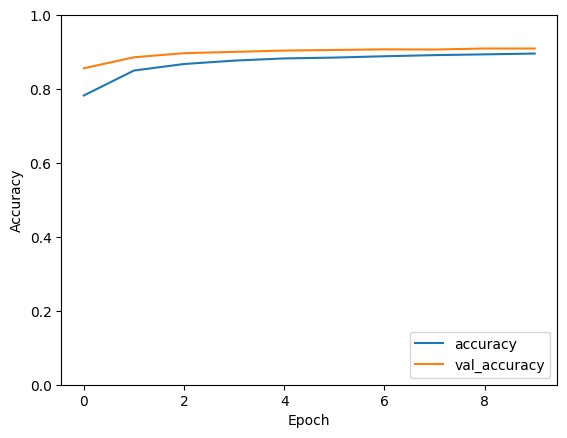

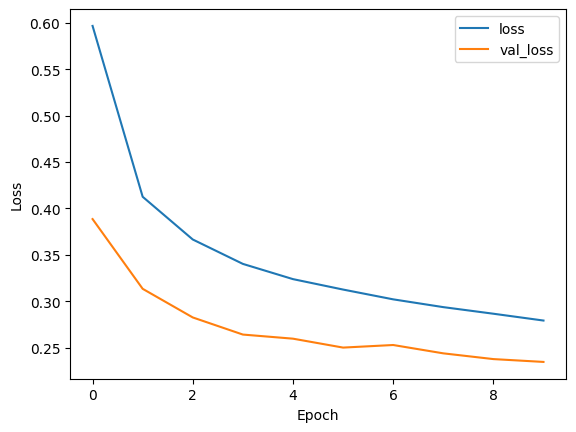

In [ ]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


313/313 [==============================] - 2s 8ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1000
           1       0.99      0.99      0.99      1000
           2       0.93      0.76      0.83      1000
           3       0.91      0.94      0.93      1000
           4       0.82      0.89      0.86      1000
           5       0.99      0.98      0.99      1000
           6       0.71      0.76      0.74      1000
           7       0.95      0.97      0.96      1000
           8       0.99      0.99      0.99      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

Confusion Matrix:


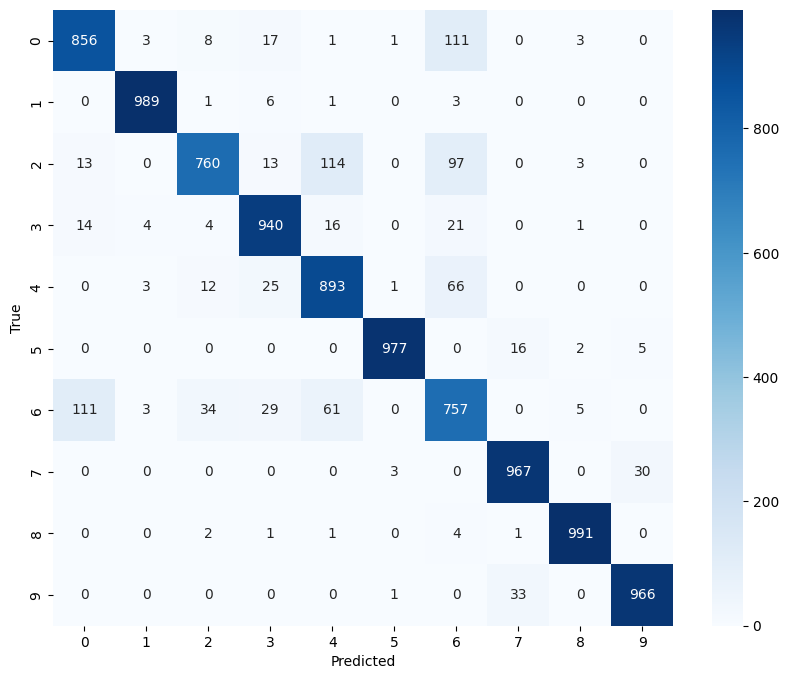

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

print("Confusion Matrix:")
cmat = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cmat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


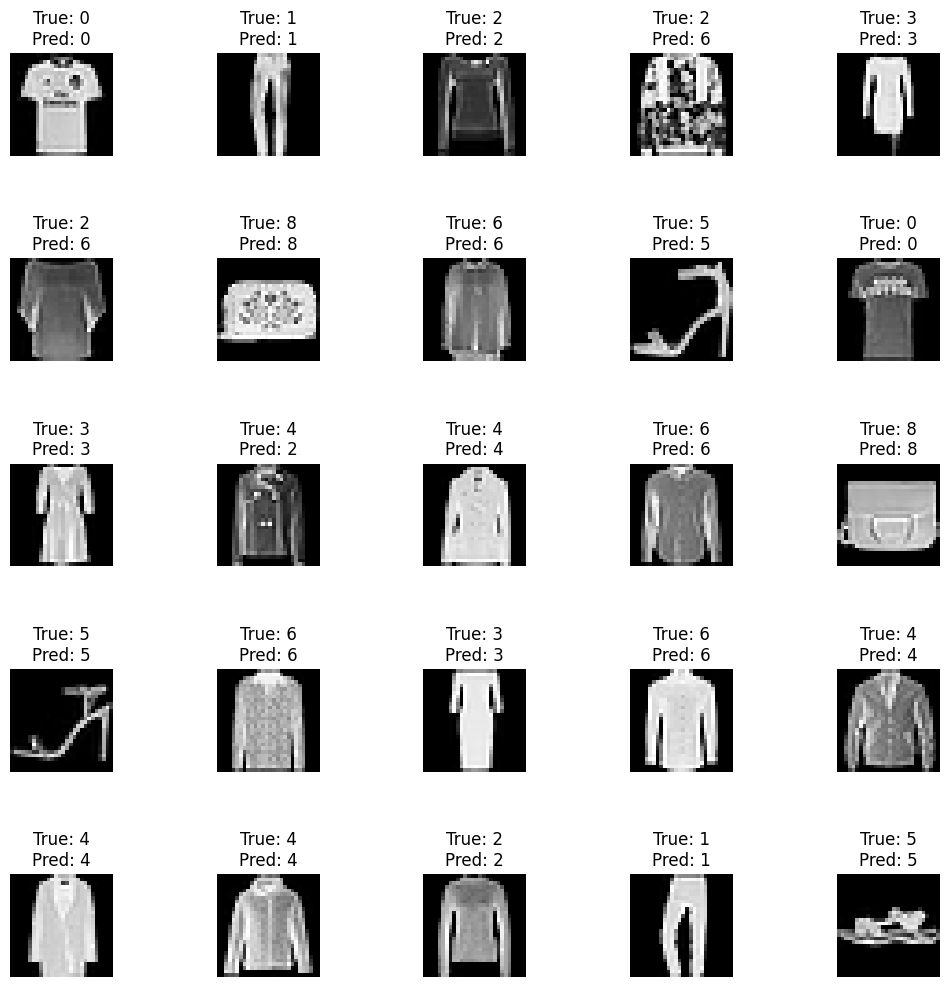

In [ ]:
fig, axes = plt.subplots(5, 5, figsize=(12, 12))
axes = axes.ravel()
for i in np.arange(0, 25):
    axes[i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"True: {y_true[i]}\nPred: {y_pred_classes[i]}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=1, hspace=1)
plt.show()


In [ ]:
# Get indices of misclassified samples
misclassified_indices = np.where(y_true != y_pred_classes)[0]

print(f"Number of misclassified samples: {len(misclassified_indices)}")


Number of misclassified samples: 904
